<a href="https://colab.research.google.com/github/nihaiqbal21/Machine-Learning/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as pnp #linear algebra
import pandas as pd #csv------
import seaborn as sns #
import matplotlib.pyplot as plt # graphical data representation


In [ ]:
%matplotlib inline

In [ ]:
data = pd.read_csv('/content/sample_data/train (1).csv')

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.describe #() for a neat table

<bound method NDFrame.describe of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                 

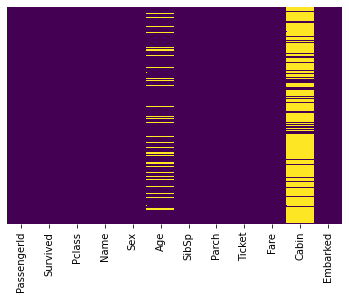

In [ ]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')  #by default

In [ ]:
sns.set_style('whitegrid') #bg white
#sns.countplot(x='PassengerId',df=data)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


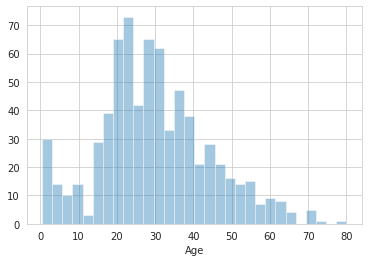

In [ ]:
sns.distplot(data['Age'].dropna(),kde=False,bins=30)

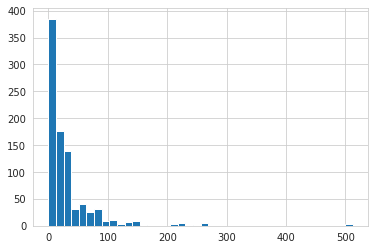

In [ ]:
data['Fare'].hist(bins=40)

In [ ]:
import cufflinks as cf
cf.go_offline()


In [ ]:
data['Age'].iplot(kind='hist', bins=40)

In [ ]:
def input_age(cols):
  Age=cols[0]
  Pclass=cols[1]
  if pd.isnull(Age):
    if Pclass==1:
      return 37
    elif Pclass==2:
              return 29
    else:
        return 24
  else:
    return Age

In [ ]:
data['Age'] = data[['Age', 'Pclass']].apply(input_age,axis=1)

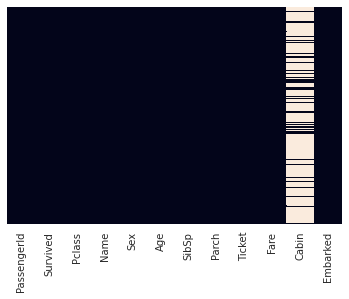

In [ ]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)

In [ ]:
data.drop('Cabin', axis=1, inplace=True)

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.dropna(inplace=True)

In [ ]:
g = pd.get_dummies(data['Sex'],drop_first=True)

In [ ]:
g.head()

,male
0,1
1,0
2,0
3,0
4,1


In [ ]:
em = pd.get_dummies(data['Embarked'], drop_first=True)

In [ ]:
em.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [ ]:
data.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [ ]:
data.head(100)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
96,97,0,1,71.0,0,0,34.6542
97,98,1,1,23.0,0,1,63.3583
98,99,1,2,34.0,0,1,23.0000
99,100,0,2,34.0,1,0,26.0000


In [ ]:
data.tail()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
886,887,0,2,27.0,0,0,13.00
887,888,1,1,19.0,0,0,30.00
888,889,0,3,24.0,1,2,23.45
889,890,1,1,26.0,0,0,30.00
890,891,0,3,32.0,0,0,7.75


In [ ]:
data.drop('PassengerId', axis=1, inplace=True)

In [ ]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [ ]:
pclass = pd.get_dummies(data['Pclass'])

In [ ]:
pclass.head()

,1,2,3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X= data.drop('Survived', axis=1)
y = data['Survived']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=101)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel = LogisticRegression()

In [ ]:
logmodel.fit(X_train,y_train)

LogisticRegression()

In [ ]:
pred = logmodel.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.73      0.88      0.80       163
           1       0.72      0.49      0.58       104

    accuracy                           0.73       267
   macro avg       0.72      0.68      0.69       267
weighted avg       0.73      0.73      0.71       267



In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, pred)

array([[143,  20],
       [ 53,  51]])